In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# file_path = "../../dataset/cri_compustat_merged_v8.pkl"

# # Open the pickle file for reading
# with open(file_path, 'rb') as file:
#     # Load the data from the pickle file
#     df = pickle.load(file)

# df.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,42404,2000.0,1,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,...,197946.597222,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
1,37610,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,...,190.722132,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291
2,49536,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,...,0.000000,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222
3,32417,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,...,269.176235,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000
4,44933,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,...,0.000000,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002


In [3]:
from google.oauth2 import service_account
import pandas_gbq as gbq 
import json
from pandas_gbq import to_gbq, read_gbq

credentials_path = '../../token.json'

# Authenticate with your credentials
credentials = service_account.Credentials.from_service_account_file(
    credentials_path, scopes=['https://www.googleapis.com/auth/bigquery'])

# Set the credentials for pandas_gbq
gbq.context.credentials = credentials

In [4]:
# import dataframe from GBQ

df = read_gbq(f"""

SELECT *
FROM capstone-402105.capstone.cri_compustat_data

""",project_id='capstone-402105', dialect='standard')

Downloading: 100%|██████████|


In [5]:
# Create two separate DataFrames based on the 'default' values
df = df.dropna()
default_0_data = df[df['Default_12'] == 0]
default_1_data = df[df['Default_12'] == 1]

In [6]:
default_0_data.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,27320,2018.0,5,0.121681,-0.004016,10.636655,-0.719606,0.758769,0.157200,0.005983,...,255.207412,0.674972,137.826531,0.000000,1.000000,37.586070,-46.140794,-41.647642,-0.310145,10.860434
1,40735,2018.0,5,0.121681,-0.004016,4.596013,0.547466,0.280534,-0.039203,0.005733,...,0.000000,6.179372,126.818182,0.000000,1.000000,12.644176,-83.159927,-80.938732,-2.448988,16.706610
2,34105,2018.0,5,0.121681,-0.004016,9.608941,1.192495,3.512448,0.632913,0.004540,...,3119.717134,0.000000,192.272727,0.000000,1.000000,25.983451,-64.498429,-58.763662,-0.132720,1.007022
3,27117,2018.0,5,0.121681,-0.004016,9.269236,-6.134049,1.122227,-0.077907,0.008095,...,180.675805,1.260570,78.387097,0.322581,0.677419,28.939728,-61.798433,-60.044946,-0.493468,9.330209
4,29707,2018.0,5,0.121681,-0.004016,7.476566,0.400249,0.851392,-0.052482,0.005873,...,404.744047,0.849067,90.555556,0.238889,0.761111,36.829145,-52.108717,-48.761289,-0.554091,13.469110


In [7]:
default_1_data.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
51,46965,2000.0,11,-0.053105,0.013117,1.912064,-1.288371,1.538674,-0.707845,-0.025442,...,0.000000,0.200185,-9.514925,0.000000,1.000000,25.350334,-196.096710,-160.672400,-0.546276,-13.727396
279,27542,2002.0,1,-0.172627,-0.004563,-0.450682,-1.110718,0.833134,-1.333451,-0.013402,...,211.781110,0.965391,180.000000,0.000000,1.000000,18.782643,-74.225331,-70.934278,-0.506667,2.086933
628,50790,2016.0,5,-0.107854,-0.008817,-0.083639,-0.300015,0.085403,0.067281,-0.007751,...,86.309267,4.397911,-1.166667,0.000000,1.000000,53.301475,-27.125840,-12.245308,-0.048684,1.390729
789,28336,2007.0,9,0.140089,0.003546,0.874357,-0.107895,0.982786,0.066176,-0.009437,...,161.877770,1.243914,-2.962963,-0.024691,1.024691,3.101920,-97.895126,-94.645495,-0.458413,-0.168750
877,33773,2022.0,6,-0.119167,-0.005083,1.083992,-1.066252,0.350293,0.045897,0.001464,...,44.116093,2.697011,-1.488095,0.000000,1.000000,10.262530,-81.418343,-76.883737,-0.184587,1.119266


In [8]:
print(default_0_data.columns.tolist())


['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'StartDate', 'EventDate', 'Default_1', 'Default_3', 'Default_6', 'Default_12', 'Default_24', 'Default_36', 'Default_60', 'Duration', 'gvkey', 'tic', 'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin', 'debt_service_coverage_ratio', 'interest_coverage_ratio']


In [9]:
selected_features = ['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 
                    'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 
                    'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Duration', 'current_ratio', 
                    'quick_ratio', 'cash_ratio', 'net_working_capital', 
                    'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 
                    'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 
                    'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 
                    'operating_profit_margin', 'ebitda_margin', 'debt_service_coverage_ratio', 'interest_coverage_ratio']

In [10]:
default_0_data[selected_features].describe()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
count,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,...,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06,1.170064e+06
mean,5.306758e-02,-3.978019e-03,4.212628e+00,-2.955968e-02,6.596468e-01,-1.192539e-02,-4.352093e-03,-1.172247e-04,4.105589e-01,-3.312675e-02,...,-2.068150e+04,1.021778e+00,5.868531e+01,2.303844e-01,-1.702744e+00,-5.461002e+04,-8.771787e+05,-8.624833e+05,-2.220764e+04,-1.872058e+04
std,1.788829e-01,7.658719e-03,2.978861e+00,1.227945e+00,8.332240e-01,2.898138e-01,3.659575e-02,3.060748e-02,2.087038e+00,3.296417e-01,...,1.771299e+06,3.084131e+02,4.100551e+02,3.236245e+00,5.362392e+01,5.312156e+05,4.291603e+06,4.252728e+06,5.303423e+04,7.233420e+04
min,-5.455788e-01,-1.209741e-02,-1.113511e+00,-3.534109e+01,-4.156714e+00,-2.559415e+00,-1.324832e+00,-6.009485e-01,-6.176606e+00,-1.923094e+00,...,-2.711250e+07,-6.403037e+04,-6.666667e+04,-7.477360e+02,-1.149000e+03,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.490411e+05,-2.972110e+05
25%,-5.310490e-02,-1.095465e-02,2.193880e+00,-6.031028e-01,0.000000e+00,-8.294211e-02,-3.245248e-03,-2.110248e-03,-1.075912e+00,-1.829782e-01,...,0.000000e+00,1.368799e-02,-1.100000e+01,0.000000e+00,7.948718e-01,1.959115e+01,-7.813014e+01,-7.320646e+01,-4.045241e+00,3.449270e-01
50%,8.364726e-02,-6.738806e-03,3.657702e+00,-9.129314e-03,5.469286e-01,0.000000e+00,1.812146e-03,2.731256e-06,3.504125e-01,-2.490218e-02,...,1.035823e+02,5.727280e-01,4.396689e+01,0.000000e+00,1.000000e+00,3.555288e+01,-5.404869e+01,-4.795686e+01,-6.173631e-01,4.243151e+00
75%,1.489924e-01,1.361954e-03,5.618157e+00,5.809156e-01,1.119621e+00,6.460126e-02,5.588348e-03,2.230053e-03,1.803696e+00,1.282380e-01,...,2.426772e+02,1.451306e+00,9.030392e+01,2.051282e-01,1.000000e+00,5.484870e+01,-2.546636e+01,-1.477632e+01,-9.596755e-02,1.319967e+01
max,7.133805e-01,1.386113e-02,1.146545e+02,1.493372e+01,4.787727e+00,2.683886e+00,2.160935e-01,6.366733e-01,6.752074e+00,2.018934e+00,...,9.736054e+08,1.096772e+05,4.137500e+04,7.650000e+02,7.487360e+02,8.017000e+05,1.603300e+06,1.582700e+06,5.576667e+03,1.326735e+05


In [11]:
default_1_data[selected_features].describe()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
count,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,...,9.350000e+03,9350.000000,9350.000000,9350.000000,9350.000000,9.350000e+03,9.350000e+03,9.350000e+03,9350.000000,9350.000000
mean,0.002145,-0.002941,1.007570,-0.541960,0.318786,-0.148851,-0.021583,-0.008369,-0.820579,-0.555104,...,-4.860036e+04,1.501440,-1.782146,-0.007576,1.007576,-2.128642e+04,-5.801733e+05,-5.697633e+05,-5215.885888,-5593.687442
std,0.174098,0.008086,1.224881,0.679272,0.730718,0.421097,0.045948,0.049232,1.674120,0.565484,...,1.155240e+06,49.679524,133.531512,1.205274,1.205274,3.308553e+05,3.512676e+06,3.479017e+06,27185.570754,40306.453004
min,-0.545579,-0.012097,-1.113511,-8.662227,-3.088424,-2.559415,-1.160677,-0.600948,-5.739824,-1.923094,...,-2.711250e+07,-830.780488,-3503.000000,-50.000000,-49.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
25%,-0.129716,-0.010451,0.190177,-0.903751,-0.064531,-0.272411,-0.024947,-0.008892,-1.953329,-0.884697,...,0.000000e+00,-0.594486,-7.647676,0.000000,1.000000,6.364562e+00,-1.241016e+02,-1.033979e+02,-0.996004,-3.386344
50%,0.042469,-0.004912,0.840010,-0.500132,0.296004,-0.066140,-0.009354,-0.001078,-0.957504,-0.501122,...,1.006291e+02,0.220327,-2.352941,0.000000,1.000000,2.186107e+01,-8.174262e+01,-7.169420e+01,-0.344877,0.167677
75%,0.129957,0.002831,1.600884,-0.130120,0.716187,0.023264,-0.002333,0.003422,0.193983,-0.182204,...,2.905990e+02,1.475235,-0.375000,0.000000,1.000000,4.159305e+01,-5.811265e+01,-4.347740e+01,-0.101877,1.763869
max,0.634633,0.013861,10.619884,4.041032,3.107368,2.683886,0.089197,0.602387,5.945415,2.018934,...,9.143250e+05,2264.928571,3817.000000,50.000000,51.000000,1.112741e+04,1.227222e+05,1.196111e+05,37.498219,4870.000000


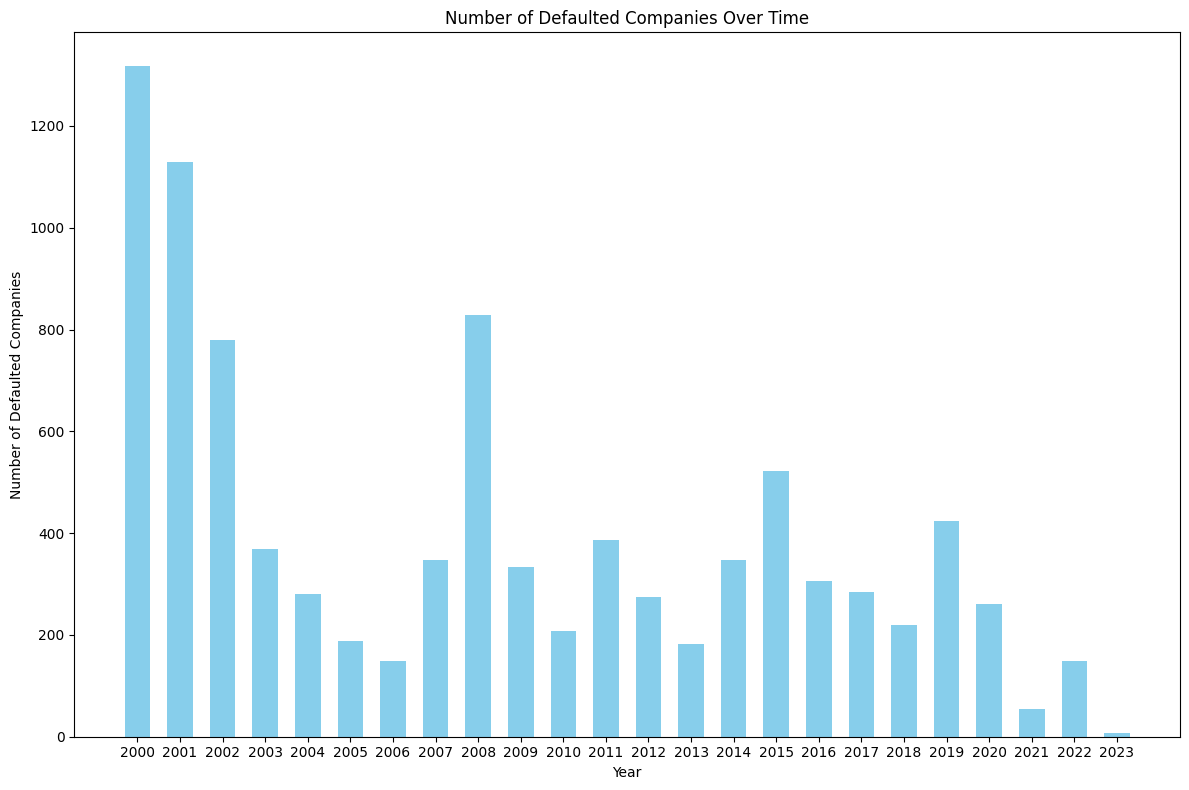

In [12]:
company_count_by_year = default_1_data['year'].value_counts().reset_index()
company_count_by_year.columns = ['year', 'CompNo']
company_count_by_year = company_count_by_year.sort_values(by='year')

plt.figure(figsize=(12, 8))

# Adjust the width of the bars for more space
bar_width = 0.6

# Increase the space between the bars by adjusting the position
positions = company_count_by_year['year']

plt.bar(positions, company_count_by_year['CompNo'], width=bar_width, color='skyblue')

plt.xlabel('Year')
plt.ylabel('Number of Defaulted Companies')
plt.title('Number of Defaulted Companies Over Time')

# Adjust the x-axis ticks for better spacing
plt.xticks(positions)

plt.tight_layout()

plt.show()

In [13]:
import tabulate
from tabulate import tabulate

# Assuming you have 'default_1_data' and 'default_0_data' DataFrames

# Calculate means and medians for each column in both datasets
means_default_0 = default_0_data[selected_features].mean()
medians_default_0 = default_0_data[selected_features].median()
means_default_1 = default_1_data[selected_features].mean()
medians_default_1 = default_1_data[selected_features].median()

# Create a summary DataFrame with means and medians
summary_data = pd.DataFrame({
    'Column': means_default_0.index,
    'Mean (default_0)': means_default_0.values,
    'Mean (default_1)': means_default_1.values,
    'Median (default_0)': medians_default_0.values,
    'Median (default_1)': medians_default_1.values
})

# Use the tabulate library to create a nicely formatted table
table = tabulate(summary_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

+-----------------------------+-------------------------+------------------------+------------------------+-----------------------+
|           Column            |    Mean (default_0)     |    Mean (default_1)    |   Median (default_0)   |  Median (default_1)   |
+-----------------------------+-------------------------+------------------------+------------------------+-----------------------+
|           StkIndx           |  0.053067579605471864   | 0.0021450416381810595  |   0.0836472609987555   |  0.0424686536485096   |
|            STInt            | -0.0039780186206650825  | -0.0029414097334946408 |   -0.006738805710009   |  -0.0049115009328606  |
|          dtdlevel           |    4.212628145701192    |   1.0075703172389658   |   3.657701874896123    |  0.8400103302819575   |
|          dtdtrend           |  -0.029559676285848102  |  -0.5419602573971262   |  -0.00912931410905845  |  -0.5001317028423722  |
|       liqnonfinlevel        |   0.6596467947813109    |  0.318785892524288

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is the target variable (defaulted or not)
# Make sure you've split your data into training and testing sets
df2 = df.copy()[selected_features+['Default_12']]    

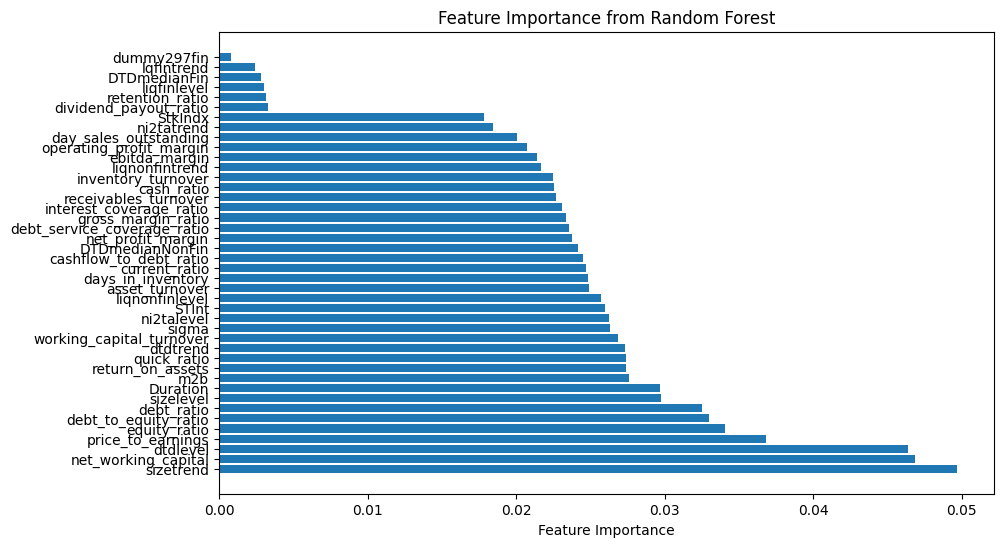

In [19]:
X = df2.drop(['Default_12'], axis=1)
y = df2['Default_12']

# Fit a random forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_

# Create a dataframe to show feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


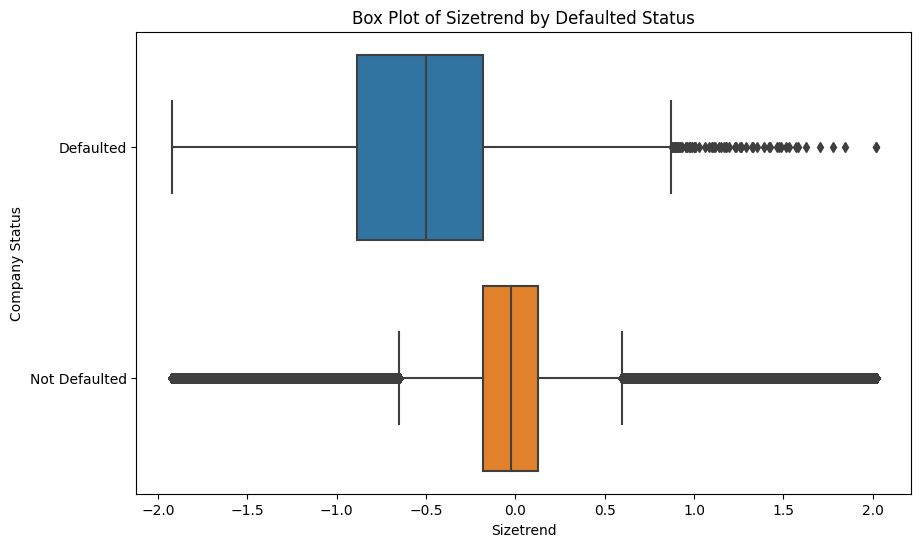

In [20]:
# Create separate dataframes for each group
defaulted_df = default_1_data[['sizetrend']]
not_defaulted_df = default_0_data[['sizetrend']]

# Create a box plot to compare 'Sizetrend' between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='sizetrend', y='group', data=pd.concat([defaulted_df.assign(group='Defaulted'), not_defaulted_df.assign(group='Not Defaulted')]))
plt.title('Box Plot of Sizetrend by Defaulted Status')
plt.xlabel('Sizetrend')
plt.ylabel('Company Status')
plt.show()

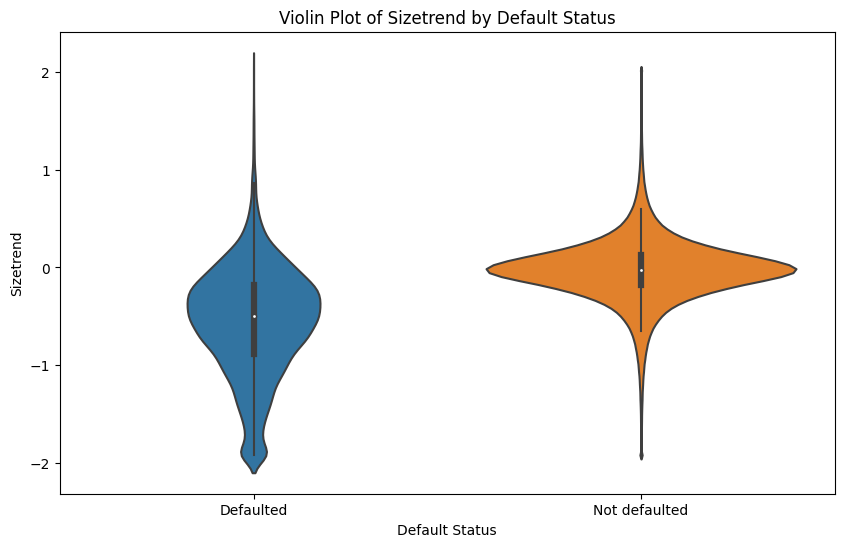

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='sizetrend', data=pd.concat([default_1_data.assign(Group='Defaulted'), default_0_data.assign(Group='Not defaulted')]))
plt.title('Violin Plot of Sizetrend by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Sizetrend')
plt.show()

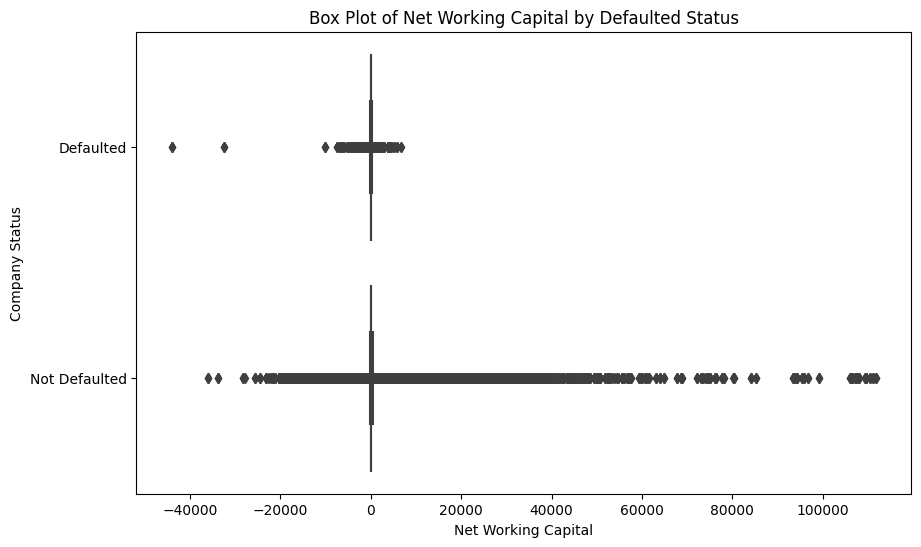

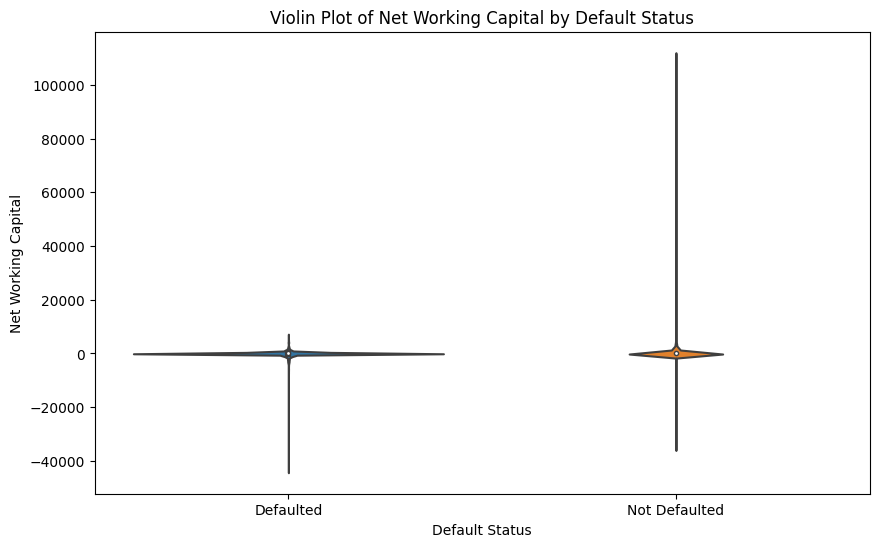

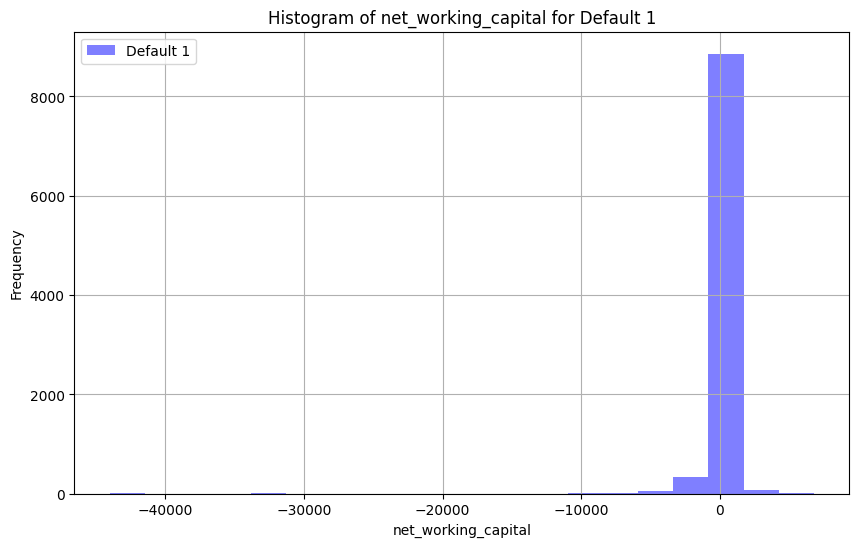

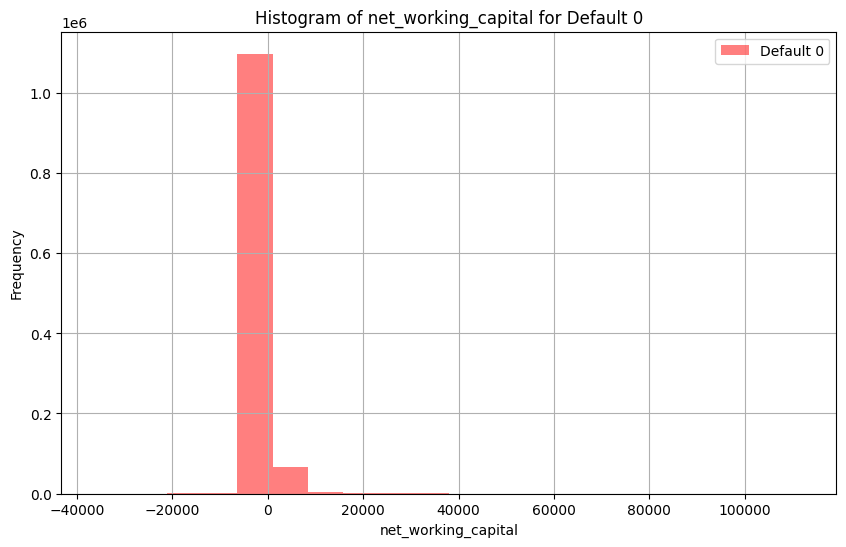

In [22]:
# Create separate dataframes for each group
defaulted_df = default_1_data[['net_working_capital']]
not_defaulted_df = default_0_data[['net_working_capital']]

# Create a box plot to compare 'Sizetrend' between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='net_working_capital', y='group', data=pd.concat([defaulted_df.assign(group='Defaulted'), not_defaulted_df.assign(group='Not Defaulted')]))
plt.title('Box Plot of Net Working Capital by Defaulted Status')
plt.xlabel('Net Working Capital')
plt.ylabel('Company Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='net_working_capital', data=pd.concat([default_1_data.assign(Group='Defaulted'), default_0_data.assign(Group='Not Defaulted')]))
plt.title('Violin Plot of Net Working Capital by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Net Working Capital')
plt.show()

# Create separate histograms for each group
plt.figure(figsize=(10, 6))
plt.hist(default_1_data['net_working_capital'], bins=20, color='blue', alpha=0.5, label='Default 1')
plt.title('Histogram of net_working_capital for Default 1')
plt.xlabel('net_working_capital')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Create a separate histogram for 'Sizetrend' in default_0_data
plt.figure(figsize=(10, 6))
plt.hist(default_0_data['net_working_capital'], bins=20, color='red', alpha=0.5, label='Default 0')
plt.title('Histogram of net_working_capital for Default 0')
plt.xlabel('net_working_capital')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

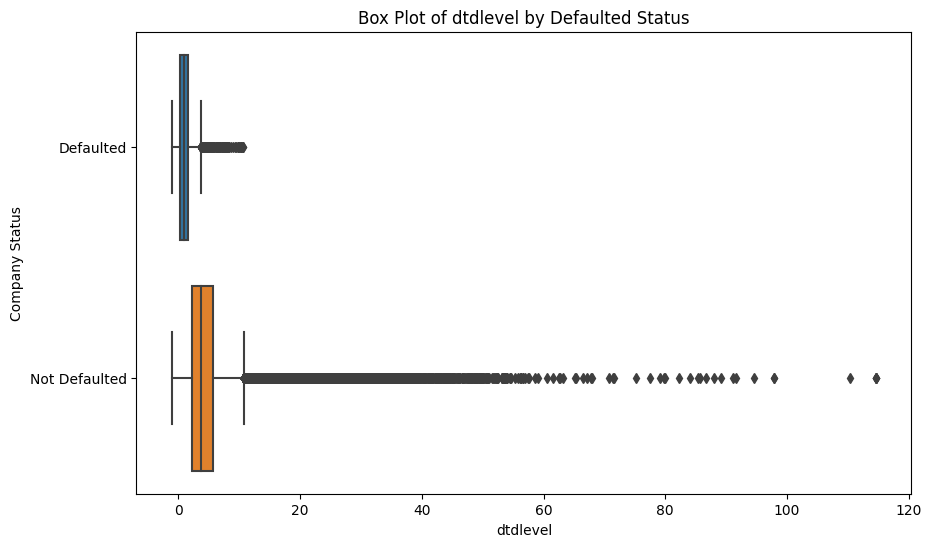

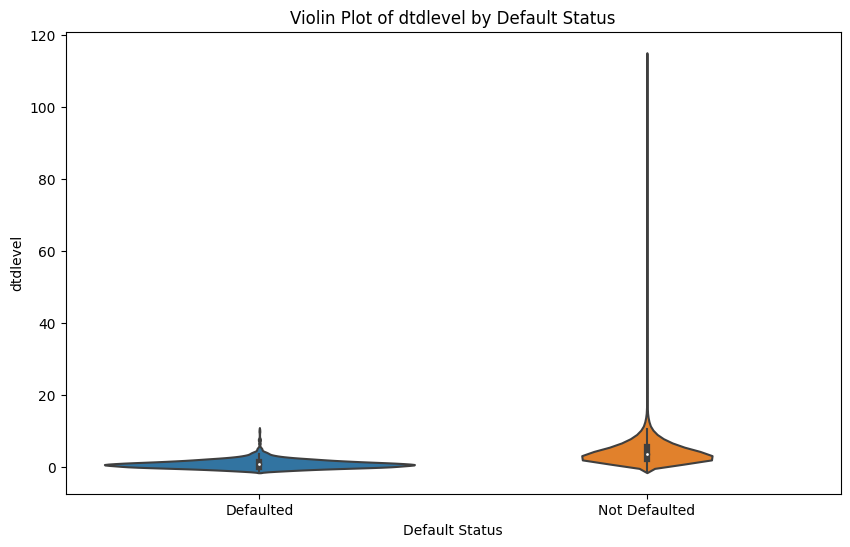

In [23]:
# Create separate dataframes for each group
defaulted_df = default_1_data[['dtdlevel']]
not_defaulted_df = default_0_data[['dtdlevel']]

# Create a box plot to compare 'Sizetrend' between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='dtdlevel', y='group', data=pd.concat([defaulted_df.assign(group='Defaulted'), not_defaulted_df.assign(group='Not Defaulted')]))
plt.title('Box Plot of dtdlevel by Defaulted Status')
plt.xlabel('dtdlevel')
plt.ylabel('Company Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='dtdlevel', data=pd.concat([default_1_data.assign(Group='Defaulted'), default_0_data.assign(Group='Not Defaulted')]))
plt.title('Violin Plot of dtdlevel by Default Status')
plt.xlabel('Default Status')
plt.ylabel('dtdlevel')
plt.show()

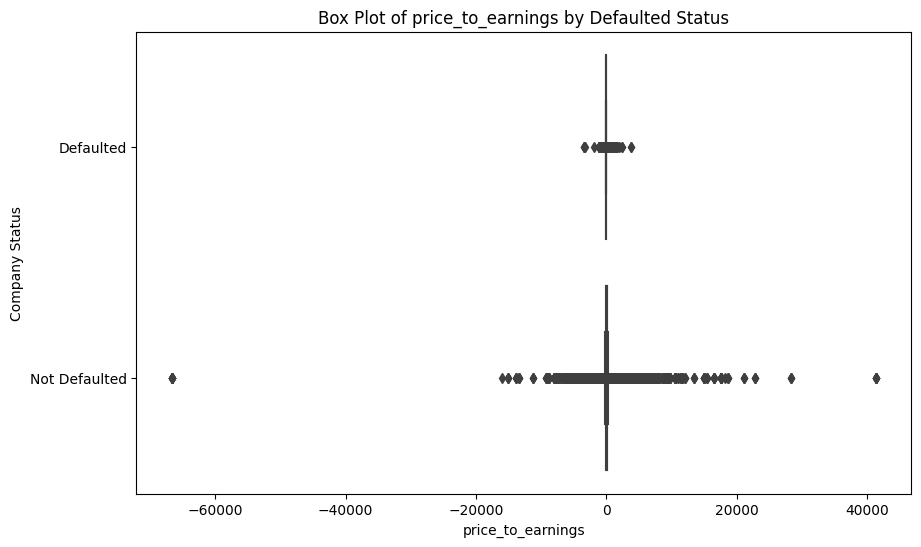

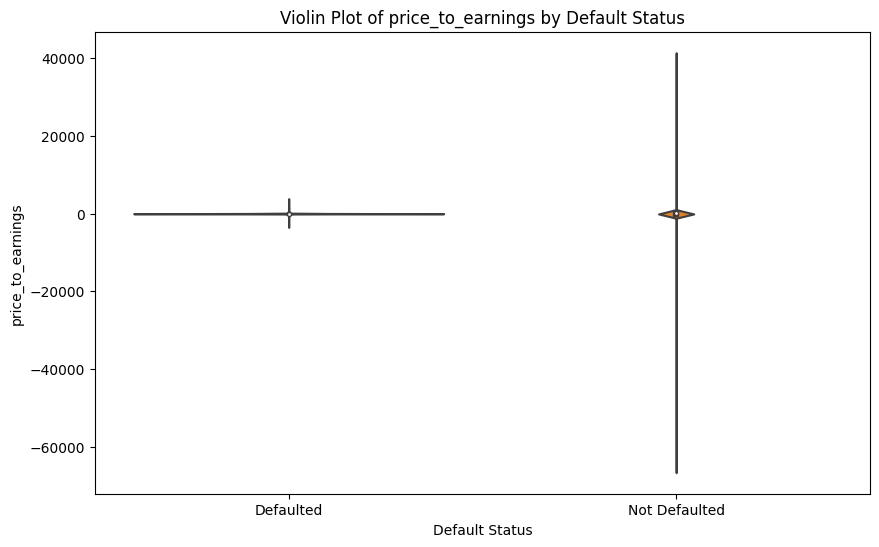

In [24]:
# Create separate dataframes for each group
defaulted_df = default_1_data[['price_to_earnings']]
not_defaulted_df = default_0_data[['price_to_earnings']]

# Create a box plot to compare 'price_to_earnings' between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_to_earnings', y='group', data=pd.concat([defaulted_df.assign(group='Defaulted'), not_defaulted_df.assign(group='Not Defaulted')]))
plt.title('Box Plot of price_to_earnings by Defaulted Status')
plt.xlabel('price_to_earnings')
plt.ylabel('Company Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='price_to_earnings', data=pd.concat([default_1_data.assign(Group='Defaulted'), default_0_data.assign(Group='Not Defaulted')]))
plt.title('Violin Plot of price_to_earnings by Default Status')
plt.xlabel('Default Status')
plt.ylabel('price_to_earnings')
plt.show()

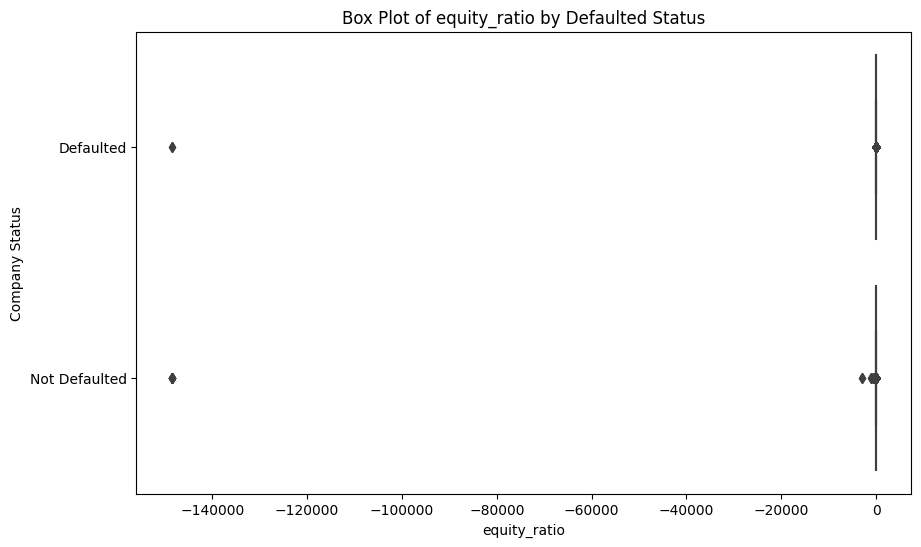

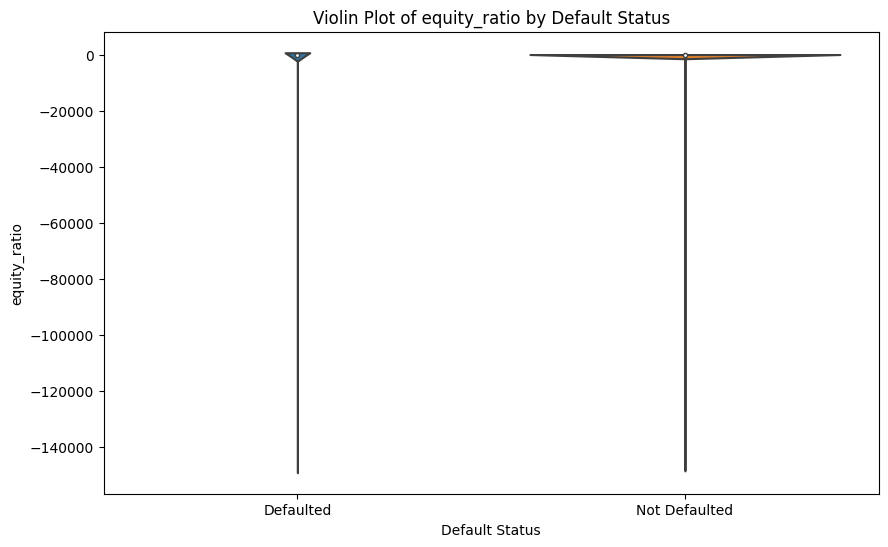

In [25]:
# Create separate dataframes for each group
defaulted_df = default_1_data[['equity_ratio']]
not_defaulted_df = default_0_data[['equity_ratio']]

# Create a box plot to compare 'debt_to_equity_ratio' between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='equity_ratio', y='group', data=pd.concat([defaulted_df.assign(group='Defaulted'), not_defaulted_df.assign(group='Not Defaulted')]))
plt.title('Box Plot of equity_ratio by Defaulted Status')
plt.xlabel('equity_ratio')
plt.ylabel('Company Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='equity_ratio', data=pd.concat([default_1_data.assign(Group='Defaulted'), default_0_data.assign(Group='Not Defaulted')]))
plt.title('Violin Plot of equity_ratio by Default Status')
plt.xlabel('Default Status')
plt.ylabel('equity_ratio')
plt.show()

Nothing very insightful other than plot for top 1 important features: sizetrend